## Invstigation of World Development Indicators Dataset

### The main question: Are teachers in primary and secondary education parallel increase with  the enrolment of students?

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [39]:
data = pd.read_csv('indicator.csv')
data.shape  #count numbers of rows and columns 

(5656458, 6)

In [40]:
data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [41]:
data.tail()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5656453,Zimbabwe,ZWE,Time required to register property (days),IC.PRP.DURS,2015,36.0
5656454,Zimbabwe,ZWE,Time required to start a business (days),IC.REG.DURS,2015,90.0
5656455,Zimbabwe,ZWE,Time to prepare and pay taxes (hours),IC.TAX.DURS,2015,242.0
5656456,Zimbabwe,ZWE,Time to resolve insolvency (years),IC.ISV.DURS,2015,3.3
5656457,Zimbabwe,ZWE,Total tax rate (% of commercial profits),IC.TAX.TOTL.CP.ZS,2015,32.8


### How many uniqe indicators are in the data

In [42]:
indicators = data['IndicatorName'].unique().tolist()
len(indicators)

1344

In [43]:
indicators

['Adolescent fertility rate (births per 1,000 women ages 15-19)',
 'Age dependency ratio (% of working-age population)',
 'Age dependency ratio, old (% of working-age population)',
 'Age dependency ratio, young (% of working-age population)',
 'Arms exports (SIPRI trend indicator values)',
 'Arms imports (SIPRI trend indicator values)',
 'Birth rate, crude (per 1,000 people)',
 'CO2 emissions (kt)',
 'CO2 emissions (metric tons per capita)',
 'CO2 emissions from gaseous fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (% of total)',
 'CO2 emissions from liquid fuel consumption (kt)',
 'CO2 emissions from solid fuel consumption (% of total)',
 'Death rate, crude (per 1,000 people)',
 'Fertility rate, total (births per woman)',
 'Fixed telephone subscriptions',
 'Fixed telephone subscriptions (per 100 people)',
 'Hospital beds (per 1,000 people)',
 'International migrant stock (% of population)',
 'International migrant stock, total',
 'Life expectancy at birt

### Are there any missing data?

In [75]:
 data.isnull().any().any()

False

### Explore  teachers in primary education in Arab World

In [44]:
teacher_indicator = 'Teachers in primary education, both sexes'
country = 'ARB'

mask1 = data['IndicatorName'].str.contains(teacher_indicator) 
mask2 = data['CountryCode'].str.contains(country)


both = data[mask1 & mask2]
both.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
297857,Arab World,ARB,"Teachers in primary education, both sexes (num...",SE.PRM.TCHR,1970,435810.43750
360417,Arab World,ARB,"Teachers in primary education, both sexes (num...",SE.PRM.TCHR,1971,449728.12500
428702,Arab World,ARB,"Teachers in primary education, both sexes (num...",SE.PRM.TCHR,1972,474579.96875
498598,Arab World,ARB,"Teachers in primary education, both sexes (num...",SE.PRM.TCHR,1973,496619.25000
567988,Arab World,ARB,"Teachers in primary education, both sexes (num...",SE.PRM.TCHR,1974,514422.53125


### What is the range of years in the data?

In [45]:
years = both['Year'].values
print(min(years)," to ",max(years))

1970  to  2013


### Visulize the numbers of teachers in primary education over time

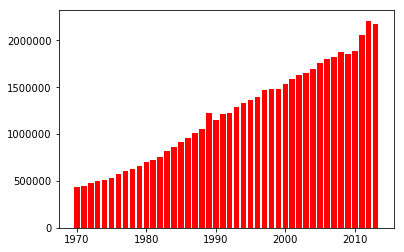

In [88]:
teacher = both['Value'].values
plt.bar(years,teacher, color= 'red')
plt.show()

#### it shows increasing in teachers number over time 

### Explore the enrolement in primary education

In [47]:
enrolment_indicator = 'Enrolment in primary education, both sexes'
country = 'ARB'

mask3 = data['IndicatorName'].str.contains(enrolment_indicator) 
mask4 = data['CountryCode'].str.contains(country)


enrolement_both = data[mask3 & mask4]
enrolement_both.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
297699,Arab World,ARB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,1970,14686948.0
360260,Arab World,ARB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,1971,15085771.0
428537,Arab World,ARB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,1972,15812551.0
498438,Arab World,ARB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,1973,16502372.0
567813,Arab World,ARB,"Enrolment in primary education, both sexes (nu...",SE.PRM.ENRL,1974,16995914.0


In [48]:
enr_years = enrolement_both['Year'].values
print(min(enr_years)," to ",max(enr_years))

1970  to  2013


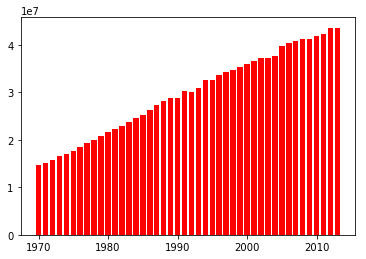

In [87]:
students = enrolement_both['Value'].values
plt.bar(enr_years,students, color= 'red')
plt.show()

#### it shows increasing in enrolment if student in primary education over time

In [50]:
students.max() , students.min()

(43582384.0, 14686948.0)

### visulize the relationship between teachers number and enrolement in primary education

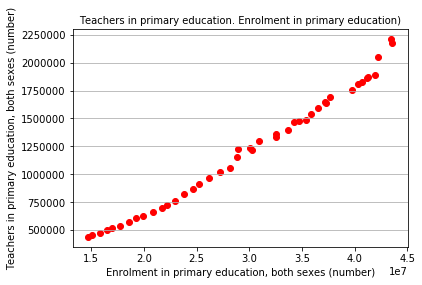

In [86]:

fig, axis = plt.subplots()
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True)
axis.set_title('Teachers in primary education. Enrolment in primary education)',fontsize=10)
axis.set_xlabel(enrolement_both['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(both['IndicatorName'].iloc[0],fontsize=10)

X = enrolement_both['Value']
Y = both['Value']

axis.scatter(X, Y, color= 'red')
plt.show()

In [53]:
np.corrcoef(enrolement_both['Value'],both['Value'])

array([[ 1.        ,  0.99369539],
       [ 0.99369539,  1.        ]])

#### A correlation of  0.99369539 is very strong

### Explore  teachers in secondary education in Arab World 

In [54]:
secondary_indicator = 'Teachers in secondary education, both sexes'
country = 'ARB'

mask1 = data['IndicatorName'].str.contains(secondary_indicator) 
mask2 = data['CountryCode'].str.contains(country)


secondary_both = data[mask1 & mask2]
secondary_both.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
297858,Arab World,ARB,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,1970,212238.171875
360418,Arab World,ARB,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,1971,219401.843750
428703,Arab World,ARB,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,1972,231497.000000
498599,Arab World,ARB,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,1973,245709.781250
567989,Arab World,ARB,"Teachers in secondary education, both sexes (n...",SE.SEC.TCHR,1974,259457.796875


In [55]:
sec_years = secondary_both['Year'].values
print(min(sec_years)," to ",max(sec_years))

1970  to  2013


### Visulize the numbers of teachers in secondary education over time

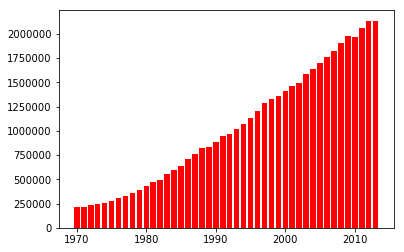

In [85]:
sec_teacher = secondary_both['Value'].values
plt.bar(sec_years,sec_teacher, color= 'red')
plt.show()

### Explore the enrolement in secondary education

In [57]:
secEnrolement_indicator = 'Enrolment in secondary education, both sexes'
country = 'ARB'

mask1 = data['IndicatorName'].str.contains(secEnrolement_indicator) 
mask2 = data['CountryCode'].str.contains(country)


secEnrolement_both = data[mask1 & mask2]
secEnrolement_both.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
297700,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1970,4794429.5
360261,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1971,4942031.0
428538,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1972,5239153.0
498439,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1973,5570140.5
567814,Arab World,ARB,"Enrolment in secondary education, both sexes (...",SE.SEC.ENRL,1974,5923216.0


In [58]:
secEnr_years = secEnrolement_both['Year'].values
print(min(secEnr_years)," to ",max(secEnr_years))

1970  to  2013


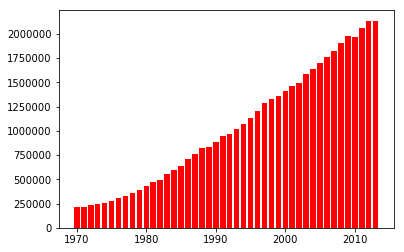

In [84]:
sec_students = secEnrolement_both['Value'].values
plt.bar(secEnr_years,sec_teacher, color= 'red')
plt.show()

### visulize the relationship between teachers number and enrolement in secondary education

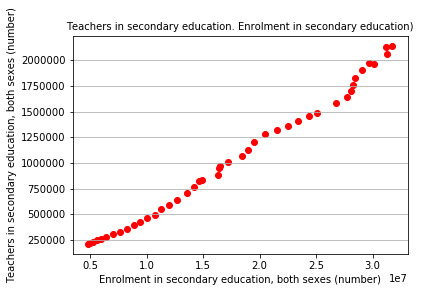

In [83]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots() 
# Grid lines, Xticks, Xlabel, Ylabel

axis.yaxis.grid(True, )
axis.set_title('Teachers in secondary education. Enrolment in secondary education)',fontsize=10)
axis.set_xlabel(secEnrolement_both['IndicatorName'].iloc[0],fontsize=10)
axis.set_ylabel(secondary_both['IndicatorName'].iloc[0],fontsize=10)

X = secEnrolement_both['Value']
Y = secondary_both['Value']

axis.scatter(X, Y, color= 'red')
plt.show()

In [62]:
np.corrcoef(secEnrolement_both['Value'],secondary_both['Value'])

array([[ 1.        ,  0.99599066],
       [ 0.99599066,  1.        ]])

#### A correlation of  0.99599066 is really high